# Mathematik für Biologiestudierende II

Sommersemester 2024

14.05.2024

&copy; 2024 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# ANOVA

Übersicht

|Verteilungsannahmen               | Test in `scipy.stats` | Post-hoc-Test        | in `scipy.stats` |
|:---------------------------------|:----------------------|:---------------------|:-----------------|
|normalverteilt, homoskedastisch   | `f_oneway`            | unverbundener t-Test | `ttest_ind`      |
|normalverteilt, heteroskedastisch | `alexandergovern`     | Welch-Test           | siehe Lektion 17 |
|nicht normalverteil               | `kruskal`             | Mann-Whitney-Test    | `mannwhitneyu`   |

t-Test, Mann-Whitney-Test, ANOVA und die anderen Tests der Tabelle dienen zum Vergleich von Mittelwerten (im parametrischen Fall) und Medianen (im nicht-parametrischen Fall) von kontinuierlichen Merkmalen

# Tests für kategorielle Daten

# $\chi^2$-Unabhängigkeitsstest

* Der Unabhängigkeitstest überprüft, ob zwei Merkmale stochastisch unabhängig sind
* Die Zufallsvariablen $X_1, \dots, X_n$ sind unabhängig mit gleicher Verteilung
* Die Zufallsvariablen $Y_1, \dots, Y_n$ sind unabhängig mit gleicher, aber möglicherweise anderer Verteilung
* Die Zufallsvariable $X_j$ beschreibt ein Merkmal mit den Ausprägungen $w_1, \dots, w_s$  
* Die Zufallsvariable $Y_j$ beschreibt ein Merkmal mit den Ausprägungen $v_1, \dots, v_r$
* Die Nullhypothese ist $P(X_1=w_\ell,\,Y_1=v_k) = P(X_1=w_\ell) \cdot P(Y_1=v_k)$ für alle Wahlen von $k$ und $\ell$ 

## Beispiel: Geschlechterverteilung in verschiedenen Fächern
   
Die Tafel zeigt die eingeschriebenen Erstsemester in einigen Fächern, sortiert nach Geschlecht

|                | Biologie | Biochemie | Chemie | Pharmazie |
|:---------------|----------|-----------|--------|-----------|
| weiblich       | 235      | 75        | 123    | 50        |
| nicht weiblich | 153      | 32        | 81     | 19        |

<!--| Summe          | 388      | 107       | 204    | 69        |  -->

* Frage: Unterscheiden sich die Geschlechterverhältnisse zwischen den Fächern signifikant zum Niveau $\alpha = 0.05$
* Das ist die Frage nach der Unabhängigkeit der Merkmale "Studienfach" und "Geschlecht"

## Kontingenztafel

* Die oben abgebildete Tafel heißt *Kontingenztafel*
* Wir geben sie als DataFrame ein

In [2]:
tafel = pd.DataFrame(index=['weiblich', 'nicht weiblich'])
tafel['Biologie'] = [235, 153]
tafel['Biochemie'] = [75, 32]
tafel['Chemie'] = [123, 81]
tafel['Pharmazie'] = [50, 19]
tafel

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,235,75,123,50
nicht weiblich,153,32,81,19


In [3]:
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
tafel.stack()

weiblich        Biologie     235
                Biochemie     75
                Chemie       123
                Pharmazie     50
nicht weiblich  Biologie     153
                Biochemie     32
                Chemie        81
                Pharmazie     19
dtype: int64

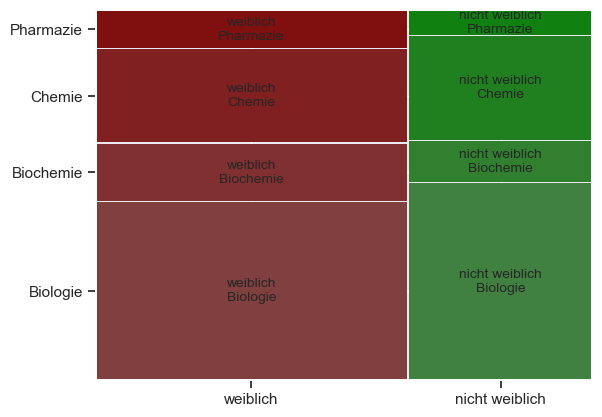

In [5]:
mosaic(tafel.stack());

Die ursprüngliche Kontingenztafel wird später noch gebraucht

In [8]:
n = 3
b = n
b

3

In [9]:
n = 4
b

3

In [6]:
df = tafel.copy()   #  df = tafel vergibt nur einen zweite Namen

### Spaltensummen

In [10]:
df.sum()

Biologie     388
Biochemie    107
Chemie       204
Pharmazie     69
dtype: int64

In [11]:
df.loc['Summe'] = df.sum()
df

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,235,75,123,50
nicht weiblich,153,32,81,19
Summe,388,107,204,69


`loc` referenziert eine Zeile

### Zeilensummen

In [12]:
df.sum(axis=1)

weiblich          483
nicht weiblich    285
Summe             768
dtype: int64

In [13]:
df['insgesamt'] = df.sum(axis=1)
df

,Biologie,Biochemie,Chemie,Pharmazie,insgesamt
weiblich,235,75,123,50,483
nicht weiblich,153,32,81,19,285
Summe,388,107,204,69,768


Die Wahrscheinlichkeit, dass eine studierende Person weiblich ist, ist

In [15]:
p_w = 483 / 768
p_w

0.62890625

Die Wahrscheinlichkeit, dass eine Person Biologie studiert, ist

In [16]:
p_bio = 388 / 768
p_bio

0.5052083333333334

Wenn Studienwahl und Geschlecht unabhängig sind, würde man im linken oberen Feld der Tafel den folgenden Wert erwarten

In [17]:
p_w * p_bio * 768

244.015625

Das machen wir jetzt für alle Einträge der Kontingenztafel

In [18]:
n = df.loc['Summe'].insgesamt
p_zeile = df.loc['Summe'] / n
p_zeile

Biologie     0.505208
Biochemie    0.139323
Chemie       0.265625
Pharmazie    0.089844
insgesamt    1.000000
Name: Summe, dtype: float64

In [20]:
p_spalte = df.insgesamt / n
p_spalte

weiblich          0.628906
nicht weiblich    0.371094
Summe             1.000000
Name: insgesamt, dtype: float64

In [21]:
erwartet = pd.DataFrame(index = df.index)

In [22]:
erwartet['Biologie'] = n*p_zeile['Biologie']*p_spalte
erwartet['Biochemie'] = n*p_zeile['Biochemie']*p_spalte
erwartet['Chemie'] = n*p_zeile['Chemie']*p_spalte
erwartet['Pharmazie'] = n*p_zeile['Pharmazie']*p_spalte
erwartet['insgesamt'] = erwartet.sum(axis=1)
erwartet

,Biologie,Biochemie,Chemie,Pharmazie,insgesamt
weiblich,244.015625,67.292969,128.296875,43.394531,483.0
nicht weiblich,143.984375,39.707031,75.703125,25.605469,285.0
Summe,388.000000,107.000000,204.000000,69.000000,768.0


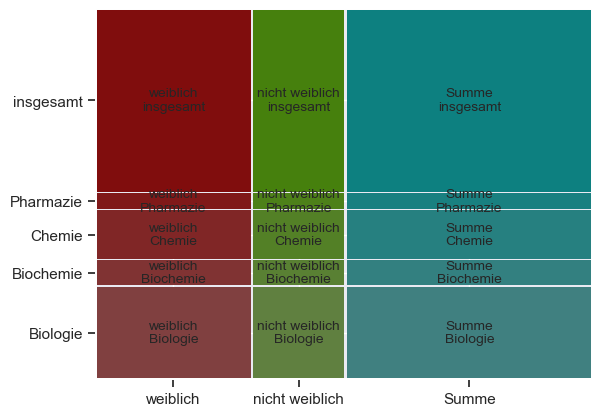

In [23]:
mosaic(erwartet.stack());

Eigentlich wollen wir nur das Bild ohne "Summe" und "insgesamt":

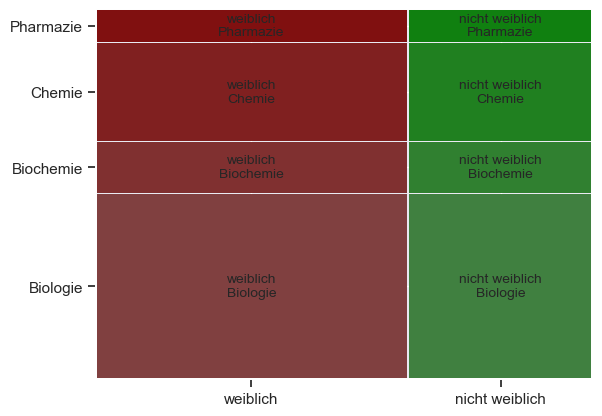

In [24]:
mosaic(erwartet.drop(index='Summe').drop(columns='insgesamt').stack());

Das ist das Bild, wenn die beiden Zufallsvariablen unabhängig sind

zum Vergleich

In [25]:
df - erwartet

,Biologie,Biochemie,Chemie,Pharmazie,insgesamt
weiblich,-9.015625,7.707031,-5.296875,6.605469,0.0
nicht weiblich,9.015625,-7.707031,5.296875,-6.605469,0.0
Summe,0.000000,0.000000,0.000000,0.000000,0.0


Aus diesen Unterschieden wird die Statistik berechnet.  Dabei werden die Differenzen quadriert und durch die erwarteten Werte geteilt

In [26]:
tafel2 = (df-erwartet)**2 / erwartet
tafel2

,Biologie,Biochemie,Chemie,Pharmazie,insgesamt
weiblich,0.333100,0.882683,0.218687,1.005477,0.0
nicht weiblich,0.564516,1.495915,0.370617,1.704019,0.0
Summe,0.000000,0.000000,0.000000,0.000000,0.0


Die Summen müssen neu bestimmt werden

In [27]:
tafel2.loc['Summe'] = tafel2.sum()
tafel2['insgesamt'] = tafel2.sum(axis=1)
tafel2

,Biologie,Biochemie,Chemie,Pharmazie,insgesamt
weiblich,0.333100,0.882683,0.218687,1.005477,2.439947
nicht weiblich,0.564516,1.495915,0.370617,1.704019,4.135067
Summe,0.897616,2.378597,0.589304,2.709497,6.575014


Die Summe über alle Einträge ist die Teststatistik

In [28]:
t = tafel2.loc['Summe'].insgesamt
t

6.575014133739289

* Die zum $\chi^2$-Unabhängigkeitstest gehörende Verteilung ist die $\chi^2$-Verteilung.
* Sie hat Freiheitsgrade
* Wenn die Kontingenztafel $r$ Zeilen und $c$ Spalten hat, dann ist die Zahl der Freiheitsgrade gleich $(r-1) \cdot (c-1)$

* Im Beispiel ist das $(2-1) \cdot (4-1) = 3$ 

In [29]:
P = stats.chi2(3)
1 - P.cdf(t)

0.08675061576179643

Nicht signifikant

* Das geht auch automatisch
* Achtung:  Es muss die ursprüngliche Kontingenztafel ohne hinzugefügte Summenzeilen oder -Spalten verwendet werden

In [30]:
res = stats.chi2_contingency(tafel)
res

Chi2ContingencyResult(statistic=6.5750141337392884, pvalue=0.08675061576179643, dof=3, expected_freq=array([[244.015625  ,  67.29296875, 128.296875  ,  43.39453125],
       [143.984375  ,  39.70703125,  75.703125  ,  25.60546875]]))

In [31]:
res.pvalue

0.08675061576179643

In [32]:
pd.DataFrame(res.expected_freq)

,0,1,2,3
0,244.015625,67.292969,128.296875,43.394531
1,143.984375,39.707031,75.703125,25.605469


## Anwendbarkeit

* Der $\chi^2$-Unabhängigkeitstest beruht auf einer Approximation
* Er ist nur zulässig, wenn alle erwarteten Werte mindestens den Wert 5 haben